<b>Section 1. Statistical Test</b>

<b>1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is  the null hypothesis? What is your p-critical value? </b>


<par> 

</par>



We will be using the MannWhitney U test to analyze the subway data. 
We will use a two-tailed P value to test the hypothesis.

Null Hypothesis implies the sample mean of people using the subway on rainny day (M<sub>rain</sub>) is equal 
to sample mean of people using the subway on a non-rainny day (M<sub>no_rain</sub>)
<p>
<b>Null Hypothesis  H<sub>0</sub>  :   M<sub>rain</sub> - M<sub>no_rain</sub> = 0  </b>
</p>

Alternate Hypothesis implies that the sample mean of people using the subway on a rainny day (M<sub>rain</sub>) is not equal to the sample mean of people using the subway on a non-rainny day. (M<sub>no_rain</sub>)
<p>
<b>Alternate Hypothesis  H<sub>0</sub>  :   M<sub>rain</sub> - M<sub>no_rain</sub> != 0</b>
</p>

The p-critical value (p) <0.05

<p> 
</p>

<b>1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples. </b>

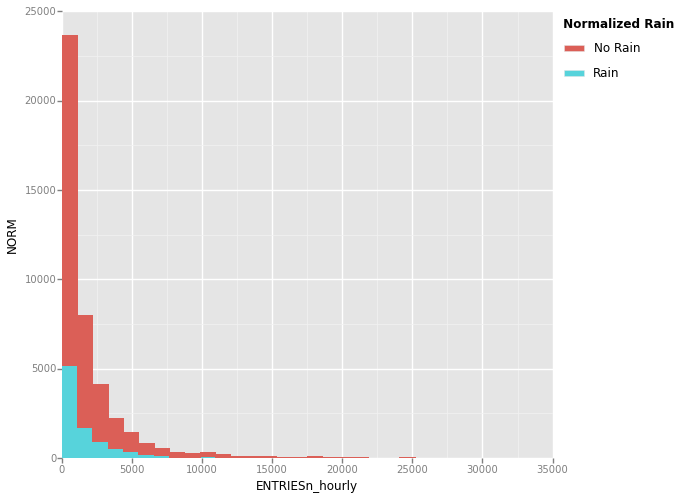

<ggplot: (36415457)>


In [3]:

"""
Code to read the subway data and plot a graph for a probility density function
"""
import pandas 
from ggplot import *
import matplotlib.mlab as mlab
import scipy
%matplotlib inline

filename = r'turnstile_weather_v2.csv'  # turnstile_data_master_with_weather.csv
data_nyc = pandas.read_csv(filename)
 
col0 = 'ENTRIESn_hourly'
data_nyc['NORM'] = mlab.normpdf(data_nyc[col0], data_nyc[col0].mean(), data_nyc[col0].std())
def fill_rain(x):
    if x==0:
        return 'NO RAIN'
    else:
        return 'RAIN'
    
data_nyc['Normalized Rain'] = data_nyc['rain'].apply(fill_rain)
a = ggplot(aes(col0, 'NORM', color='Normalized Rain', fill='Normalized Rain'), data_nyc) + geom_histogram()
print a

Looking at the histogram for the probability density function for number of entries when it rain vs when it does not rain 

<b>
1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test. </b>

In [4]:
"""
Code to calculate the mannwhitneyu test
"""
rain_data = data_nyc[data_nyc.rain == 1]
no_rain_data = data_nyc[data_nyc.rain == 0]
rain_data.fillna(0)
no_rain_data.fillna(0)
result =  scipy.stats.mannwhitneyu(no_rain_data[col0], rain_data[col0])
print 'M_rain mean     = ', rain_data[col0].mean()
print 'M_no_rain_mean  = ', no_rain_data[col0].mean()
print result
print 'Two sided p value = ', result[1]*2


M_rain mean     =  2028.19603547
M_no_rain_mean  =  1845.53943866
MannwhitneyuResult(statistic=153635120.5, pvalue=nan)
Two sided p value =  nan


<b> 1.4 What is the significance and interpretation of these results? </b>


Looking at the results of the mannwhitneyu tests we can conclude that as the p values of 0.03862 is less than 0.05 thus we reject the null hypothesis. This further implies that both the samples are significantly different.

<b>Section 2. Linear Regression <b>

<par>
</par>
    
2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?




In [66]:
"""
Code to implement OLS using statsmodels
"""
import datetime
import statsmodels.api as sm
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2011-01-01', end='2011-12-31').to_pydatetime()

"""
is_holiday
Check for weekends as well as federal holidays
"""
def is_holiday(x):
    d = datetime.datetime.strptime(x, '%m-%d-%y')    
    if d in holidays:
        return 1
    else:
        return 0
    
def convert_unit_to_float(x):
    return int(x[1:])

conds_map = {}
rand_val = 0
def convert_conds_to_value(x):
    global rand_val
    if conds_map.has_key(x):
        return conds_map[x]
    conds_map[x] = rand_val
    rand_val += 1
    return conds_map[x]

    
#features = [ 'hour','rain', 'fog', 'meantempi']
#features = [ 'Hour', 'fog', 'mintempi', 'maxtempi']
#data_nyc['IS_HOLIDAYS'] = data_nyc['DATEn'].apply(is_holiday)
data_nyc['UNIT_USED'] = data_nyc['UNIT'].apply(convert_unit_to_float)
data_nyc['WEATHER_COND'] = data_nyc['conds'].apply(convert_conds_to_value)
data_nyc['HOLIDAY_LIST'] = data_nyc['DATEn'].apply(is_holiday)
#eatures = [ 'Hour', 'meantempi', 'IS_WEEKEND', 'rain', 'precipi', 'UNIT_USED']
#features = [ 'Hour', 'meantempi', 'UNIT_USED', 'IS_HOLIDAYS']  # 0.226
#features = [ 'weather_lat', 'weather_lon','WEATHER_COND', 'UNIT_USED', 'day_week', 'weekday', 'hour', 'meantempi', 'latitude', 'longitude', 'HOLIDAY_LIST']  # 0.216
features = [ 'WEATHER_COND', 'UNIT_USED', 'weekday', 'hour','rain'  ,'tempi','weather_lon', 'latitude', 'meantempi', 'HOLIDAY_LIST']  # 0.216

lm = sm.OLS (data_nyc[col0], sm.add_constant(data_nyc[features]), missing='none').fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1203.
Date:                Fri, 25 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:35:40   Log-Likelihood:            -3.9600e+05
No. Observations:               42649   AIC:                         7.920e+05
Df Residuals:                   42638   BIC:                         7.921e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const        -5.456e+05   1.81e+04    -30.060   

In [34]:
"""
Code using scikit learn 
"""
from sklearn import linear_model
clf = linear_model.Ridge(fit_intercept=True, normalize=False)
clf.fit(data_nyc[features], data_nyc[col0])
print clf.coef_
print clf.intercept_
print clf.score(data_nyc[features], data_nyc[col0])



[ -3.60551958e+01  -7.02417481e+00   1.03270025e+03   1.22936739e+02
  -2.36501034e+00   3.14477805e+03  -5.85402159e+03  -1.20523581e+03]
-559462.662176
0.215759234751


2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?



2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  


2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?


2.5 What is your model’s R2 (coefficients of determination) value?



2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?